# HydroGeoSines

## How to calculate and view an amplitude spectrum

### Import HGS
*Note*: Currently, the HydroGeoSines is not fully implemented as an installable package. Instead. we have to move to the parent directory, to import the package.

In [1]:
import os
os.chdir("../../")
print("Current Working Directory: " , os.getcwd())

Current Working Directory:  D:\WORK\GitHub\HydroGeoSines


In [2]:
# Load the HGS package
import hydrogeosines as hgs
# and other packages used in this illustration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import a dataset

Import data from a CSV file:

In [7]:
fowlers = hgs.Site('Fowlers Gap', geoloc=[141.73099, -31.2934, 160])
fowlers.import_csv('tests/data/fowlers_gap/acworth_short.csv', 
                        input_category=['BP', 'GW', 'GW', 'GW', 'ET'],
                        utc_offset = 10,
                        unit=['m', 'm', 'm', 'm', 'm**2/s**2'],
                        loc_names = ["Baro", "FG822-1", "FG822-2", "Smith", "ET"],
                        how="add", check_duplicates=True)

Datetime was 'naive'. Localized and converted to UTC!
A new time series was added ...
No duplicates found ...


### Calculating the spectrum

Now we can calculate a spectrum for the heads:

In [8]:
process = hgs.Processing(fowlers)

fft_results  = process.fft(update=True)

-------------------------------------------------
Method: fft
There were no gaps in the data after resampling!
The groundwater (GW) and  BP data is aligned. There is exactly one BP for every GW entry!
Calculating FFT for location: FG822-1
Calculating FFT for location: FG822-2
Calculating FFT for location: Smith


### Visualising the results

The corrected heads are in the results object:

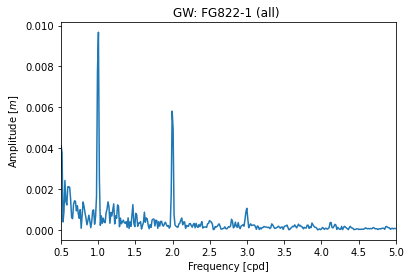

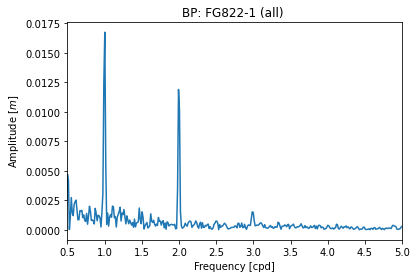

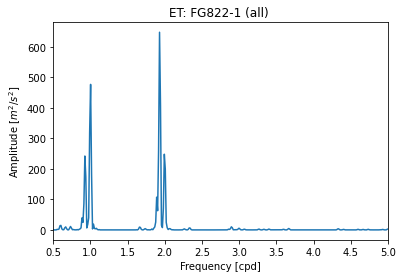

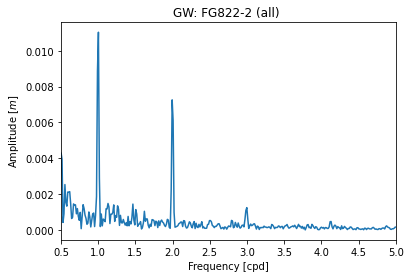

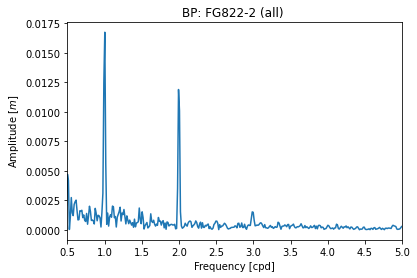

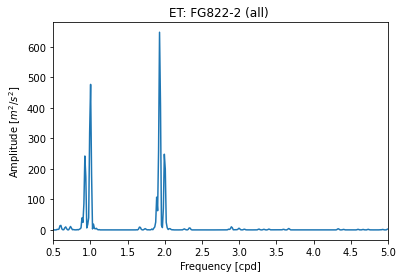

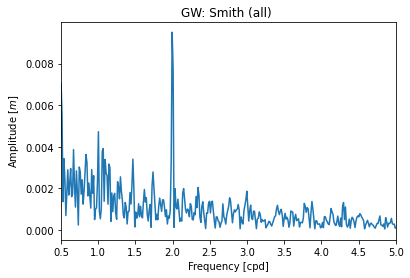

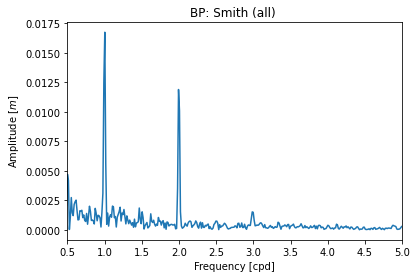

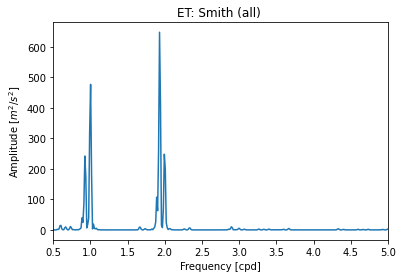

In [9]:
hgs.Output(fft_results).plot(xlim=[0.5, 5])